<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Week2_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics Lesson for Machine Learning assignment 2 Question of going down Mt. Fuji

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
csv_path = "sample_data/mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=',', skiprows=1)

In [57]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## [Problem 1] Visualization of data

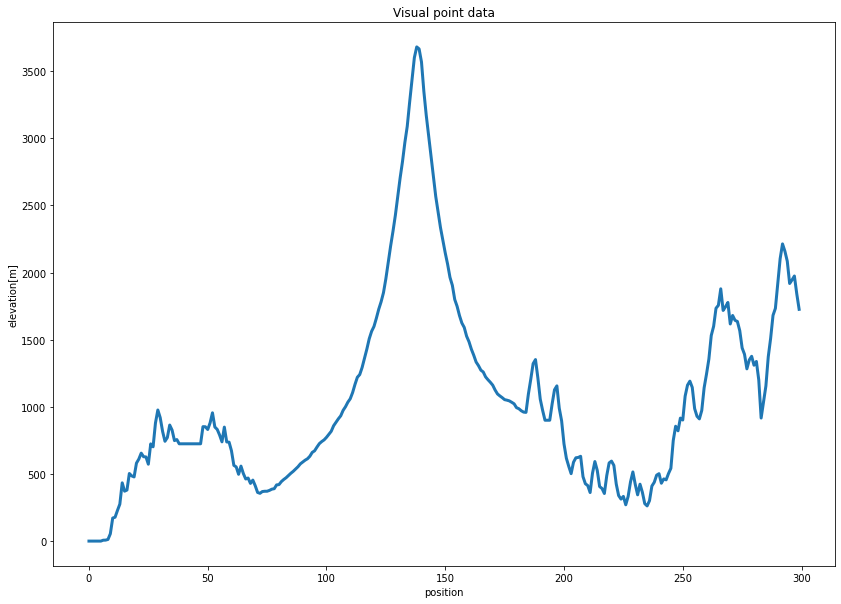

In [58]:
plt.figure(figsize=(14, 10))
plt.title("Visual point data")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], linewidth=3)
plt.show()

## [Problem 2] Create a function to calculate the slope of a point

In [59]:
def slope(currentPts, elevations):
    """
    Compute gradient
    @Param:
        currentPts (ndarray): current point(s) number
        elevations (ndarray): elevations
    @Return:
        gradient: change_amount_in_Y / change_amount_in_X
    """
    return elevations[currentPts] - elevations[currentPts - 1]  # Change amount in X is always 1 in the case

print(slope(136, fuji[:, 3]))

168.35000000000036


## [Problem 3] Create a function to calculate the destination

In [60]:
def computeDestinationPoint(currentPts, elevations, alpha=0.2):
    """
    Compute destination point
    @Param:
        currentPts (ndarray): current point(s) number
        elevations (ndarray): elevations
        alpha: learning rate
    @Return:
        Next point position
    """
    slopes = slope(currentPts, elevations)
    destinationPts = currentPts - alpha * slopes
    destinationPts = np.round(destinationPts).astype(np.int)  # Round to nearest int and cast to int type

    # Keep destinationPts in the valid range of values
    destinationPts = np.maximum(1, destinationPts)
    destinationPts = np.minimum(len(elevations) - 1, destinationPts)

    return destinationPts

In [61]:
print("Next point to go:", computeDestinationPoint(135, fuji[:, 3]))

Next point to go: 99


## [Problem 4] Creating a function to go down the mountain

In [62]:
def goDownMountain(curPt, elevations, alpha=0.1):
    """
    Compute list of points to go down mountian
    @Param:
        curPt: current point standing
        elevations: elevations
        alpha: learning rate (default=0.1)
    @Return:
        list of points
    """
    path = [curPt]
    while True:
        nextPt = computeDestinationPoint(path[-1], elevations, alpha)
        if nextPt in path:
            # Prevent visited point
            return path
        path.append(nextPt)

In [63]:
path = goDownMountain(136, fuji[:,3])
print(path)

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


## [Problem 5] Visualization of the descent process

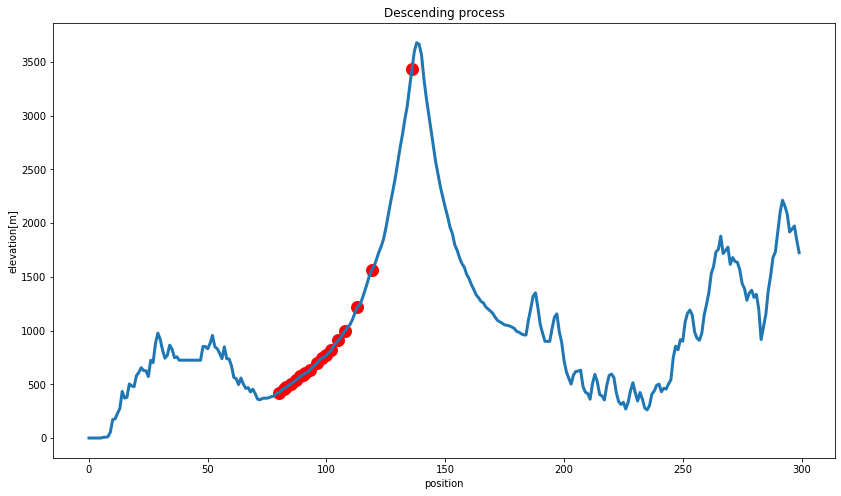

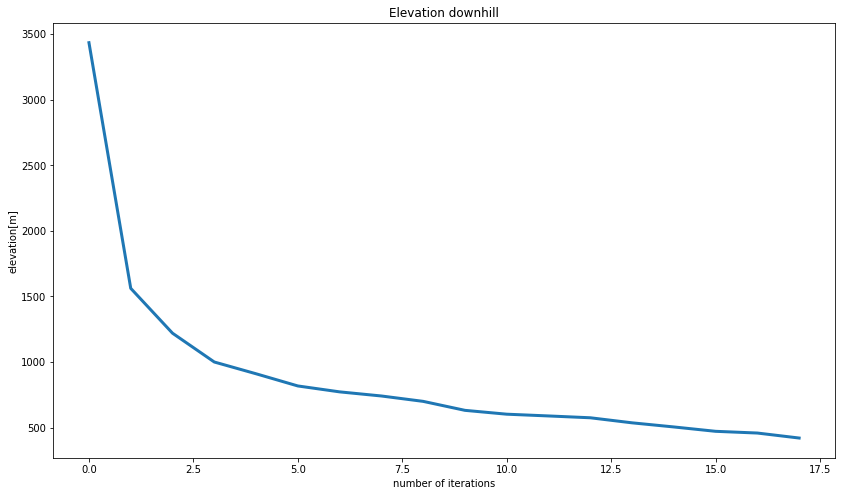

In [64]:
# Visualize descending mountain process
plt.figure(figsize=(14, 8))
plt.title("Descending process")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], linewidth=3)
plt.scatter(path, fuji[path, 3], c='r', linewidths=7)
plt.show()

# Visualize evaluation descending line
plt.figure(figsize=(14, 8))
plt.title("Elevation downhill")
plt.xlabel("number of iterations")
plt.ylabel("elevation[m]")
plt.plot(fuji[path,3], linewidth=3)
plt.show()

## [Problem 6] Change of initial value

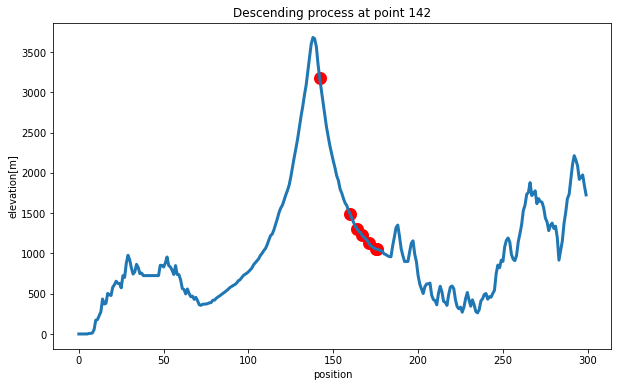

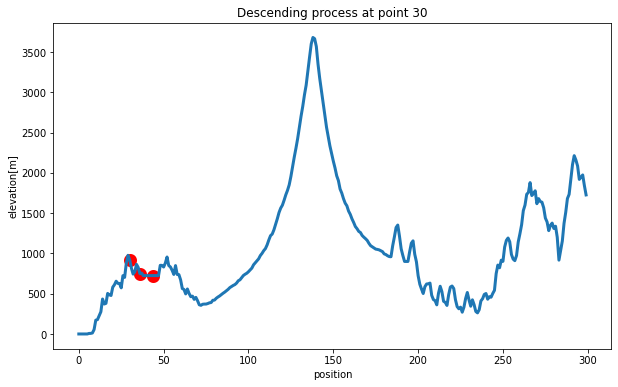

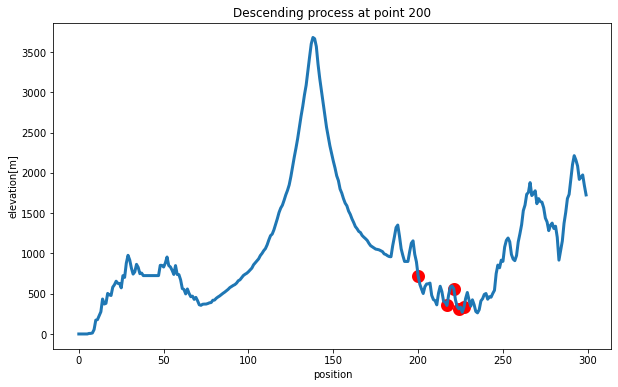

In [65]:
# Visualize some paths
path = goDownMountain(142, fuji[:, 3])
plt.figure(figsize=(10, 6))
plt.title("Descending process at point 142")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,3], linewidth=3)
plt.scatter(path, fuji[path, 3], c='r', linewidths=7)
plt.show()

path = goDownMountain(30, fuji[:, 3])
plt.figure(figsize=(10, 6))
plt.title("Descending process at point 30")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,3], linewidth=3)
plt.scatter(path, fuji[path, 3], c='r', linewidths=7)
plt.show()

path = goDownMountain(200, fuji[:, 3])
plt.figure(figsize=(10, 6))
plt.title("Descending process at point 200")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,3], linewidth=3)
plt.scatter(path, fuji[path, 3], c='r', linewidths=7)
plt.show()

## [Problem 7] (Advance problem) Change hyperparameters

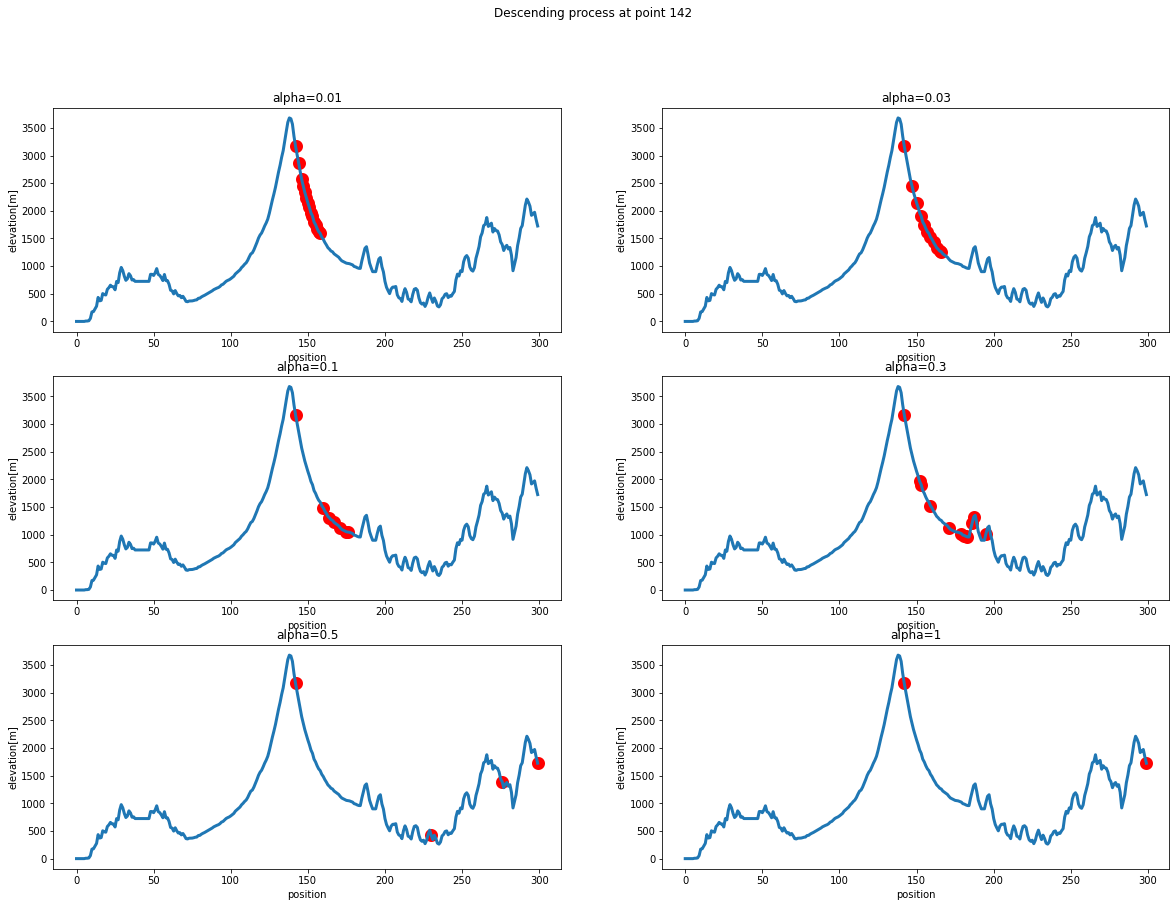

In [66]:
alphas = [0.01, 0.03, 0.1, 0.3, 0.5, 1]
point = 142
fig, ax = plt.subplots(3, 2, figsize=(20, 14))
fig.suptitle(f"Descending process at point {point}")
for i, alpha in enumerate(alphas):
    path = goDownMountain(142, fuji[:, 3], alpha)
    ax[i // 2][i % 2].set_title(f"alpha={alpha}")
    ax[i // 2][i % 2].set_xlabel("position")
    ax[i // 2][i % 2].set_ylabel("elevation[m]")
    ax[i // 2][i % 2].plot(fuji[:,3], linewidth=3)
    ax[i // 2][i % 2].scatter(path, fuji[path, 3], c='r', linewidths=7)
plt.show()

### It's shown that too low $\alpha$ can make descending process runs slowly while too high may make the process unstoppable (causing unable to stop at the lowest point)